<a href="https://colab.research.google.com/github/rafaelpds/Cursos_Data_Science/blob/main/Remover_outlider/Identificando_e_Removendo_Outliers_por_Grupo.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [22]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
plt.rc('figure', figsize=(14,6))

In [ ]:
dados = pd.read_csv('aluguel_residencial.csv', sep=';')

In [ ]:
dados.head()

,Tipo,Bairro,Quartos,Vagas,Suites,Area,Valor,Condominio,IPTU,Valor m2,Tipo Agregado
0,Quitinete,Copacabana,1,0,0,40,1700.0,500.0,60.0,42.50,Apartamento
1,Casa,Jardim Botânico,2,0,1,100,7000.0,0.0,0.0,70.00,Casa
2,Apartamento,Centro,1,0,0,15,800.0,390.0,20.0,53.33,Apartamento
3,Apartamento,Higienópolis,1,0,0,48,800.0,230.0,0.0,16.67,Apartamento
4,Apartamento,Cachambi,2,0,0,50,1300.0,301.0,17.0,26.00,Apartamento


/usr/local/lib/python3.7/dist-packages/matplotlib/cbook/__init__.py:1376: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  X = np.atleast_1d(X.T if isinstance(X, np.ndarray) else np.asarray(X))


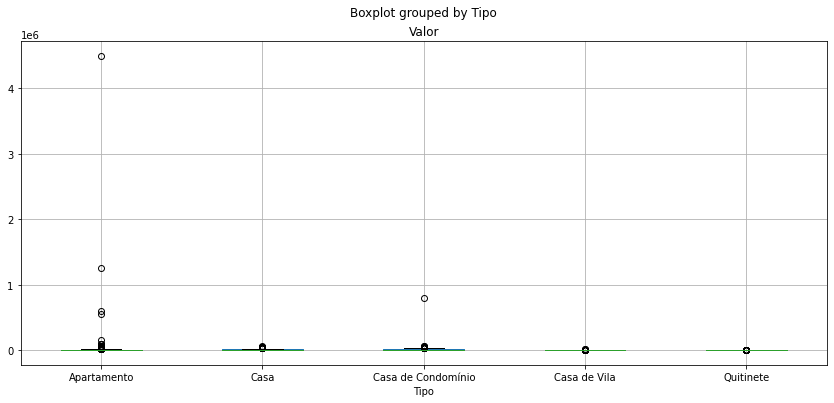

In [21]:
dados.boxplot(["Valor"], by="Tipo")

### Identificando e removendo outliers

In [27]:
grupo_tipo = dados.groupby('Tipo')['Valor']

In [30]:
grupo_tipo.groups

{'Apartamento': [2, 3, 4, 7, 8, 9, 11, 13, 14, 15, 17, 18, 19, 20, 21, 23, 24, 25, 26, 27, 29, 30, 31, 32, 33, 34, 35, 36, 37, 38, 39, 40, 41, 43, 44, 45, 46, 47, 48, 49, 50, 51, 52, 53, 55, 56, 59, 60, 61, 62, 63, 64, 65, 66, 67, 68, 69, 70, 72, 73, 74, 75, 76, 77, 79, 80, 82, 83, 84, 85, 87, 88, 89, 90, 91, 92, 93, 94, 95, 97, 98, 99, 102, 103, 104, 105, 106, 107, 108, 109, 110, 111, 112, 113, 114, 115, 116, 117, 118, 119, ...], 'Casa': [1, 22, 54, 57, 96, 100, 144, 160, 180, 238, 250, 253, 264, 286, 310, 316, 334, 339, 357, 378, 385, 399, 424, 434, 474, 475, 481, 511, 542, 543, 567, 571, 572, 618, 621, 630, 635, 636, 660, 676, 700, 721, 724, 760, 771, 780, 856, 873, 937, 982, 1029, 1036, 1118, 1123, 1125, 1157, 1178, 1249, 1256, 1316, 1335, 1350, 1371, 1412, 1426, 1430, 1440, 1445, 1472, 1475, 1488, 1586, 1604, 1656, 1662, 1666, 1671, 1684, 1709, 1717, 1762, 1810, 1835, 1875, 1905, 1933, 1942, 1960, 2019, 2039, 2056, 2075, 2101, 2107, 2108, 2133, 2170, 2201, 2204, 2211, ...], 'Casa 

In [32]:
Q1 = grupo_tipo.quantile(.25)
Q3 = grupo_tipo.quantile(.75)
IIQ = Q3 - Q1
limite_inferior = Q1 - 1.5 * IIQ
limite_superior = Q3 + 1.5 * IIQ

In [33]:
Q1

Tipo
Apartamento           1700.0
Casa                  1100.0
Casa de Condomínio    4000.0
Casa de Vila           750.0
Quitinete              900.0
Name: Valor, dtype: float64

In [34]:
Q3

Tipo
Apartamento            5000.0
Casa                   9800.0
Casa de Condomínio    15250.0
Casa de Vila           1800.0
Quitinete              1500.0
Name: Valor, dtype: float64

In [35]:
IIQ

Tipo
Apartamento            3300.0
Casa                   8700.0
Casa de Condomínio    11250.0
Casa de Vila           1050.0
Quitinete               600.0
Name: Valor, dtype: float64

In [36]:
limite_inferior

Tipo
Apartamento           -3250.0
Casa                 -11950.0
Casa de Condomínio   -12875.0
Casa de Vila           -825.0
Quitinete                 0.0
Name: Valor, dtype: float64

In [37]:
limite_superior

Tipo
Apartamento            9950.0
Casa                  22850.0
Casa de Condomínio    32125.0
Casa de Vila           3375.0
Quitinete              2400.0
Name: Valor, dtype: float64

In [39]:
limite_superior['Casa']

22850.0

#### Criando a seleção

In [40]:
for tipo in grupo_tipo.groups.keys():
  print(tipo)

Apartamento
Casa
Casa de Condomínio
Casa de Vila
Quitinete


In [42]:
dados_new = pd.DataFrame()
for tipo in grupo_tipo.groups.keys():
  eh_tipo = dados['Tipo'] == tipo
  eh_dentro_limite = (dados['Valor'] >= limite_inferior[tipo]) & (dados['Valor'] <= limite_superior[tipo])
  selecao = eh_tipo & eh_dentro_limite
  dados_selecao = dados[selecao]
  dados_new = pd.concat([dados_new, dados_selecao])

/usr/local/lib/python3.7/dist-packages/matplotlib/cbook/__init__.py:1376: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  X = np.atleast_1d(X.T if isinstance(X, np.ndarray) else np.asarray(X))


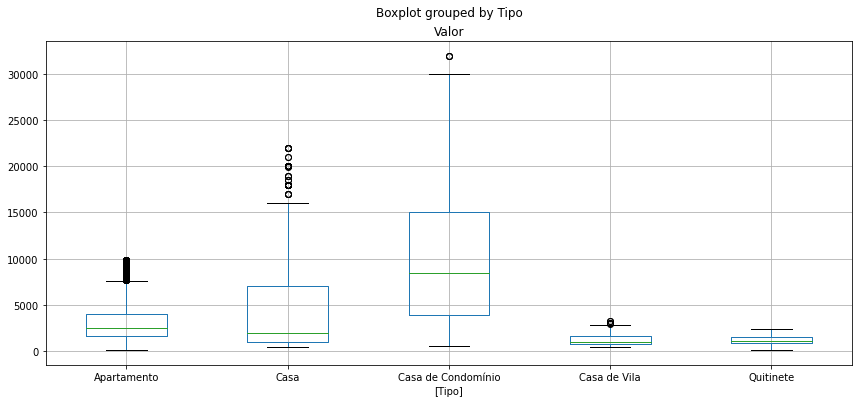

In [43]:
dados_new.boxplot(['Valor'], by=['Tipo'])

In [45]:
dados_new.to_csv('aluguel_residencial_sem_outliers.csv', sep=';', index=False)